# Regras de Associação usando Python
## Analise Estatística de Mineraçao de Dados
## Prof. Jorge Luis Bazán
## Sem 2022-1

## 1. Introdução

As regras da associação são declarações se/depois que ajudam a descobrir relacionamentos entre dados não relacionados em um banco de dados. As regras de associação são usadas para encontrar as relações entre os Itens que são frequentemente usados em conjunto.

Existem muitos algoritmos para gerar regras de associação, mas poucos deles estão abaixo.
- Algoritmo Apriori
- Algoritmo de Crescimento FP
- ECLAT

**Algoritmo Apriori**

O algoritmo Apriori é uma abordagem iterativa para descobrir os conjuntos de itens mais frequentes. 

Apriori diz:

- Se houver um item I e o Suporte (item I) < limite mínimo de suporte, então o item I não é frequente.
- Há dois itens, ou seja, item I1 e item I2. Se o suporte (item I1+ item I2) < limite mínimo de suporte, então (item I1+ item I2) não será frequente.
- Se um conjunto de itens tiver um valor inferior ao suporte mínimo, então todos os seus superconjuntos também cairão abaixo do suporte min, e assim podem ser ignorados. Esta propriedade é chamada de propriedade Antimonotona.

Este algoritmo usa duas etapas para reduzir o espaço de pesquisa:

- Junte-se ao Passo: Esta etapa gera (K+1) conjunto de itens a partir de conjuntos de itens K, juntando-se a cada item.
- Passo da ameixa: Esta etapa verifica a contagem de cada item no banco de dados. Se o item candidato não satisfaz o requisito mínimo de suporte, então ele é considerado pouco frequente e, portanto, é removido. Esta etapa reduz o tamanho dos conjuntos de itens candidatos.

## 2.  Estudando os Dados
O Conjunto de Dados da Cesta de Mercado de Compras (Grocery data) que apresentamos anteriormente será usado aqui. O conjunto de dados contém 9835 transações por clientes que compram mantimentos num Supermercado por um mês. 

Os dados contêm 169 itens diferentes.

A seguir mostramos algumas características dos ítems

In [8]:
#pip install mlxtend  

In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [10]:
data = pd.read_csv('groceries.csv', sep='\t', header=None)


In [11]:
data.shape

(9835, 1)

In [12]:
data.rename(columns={0: 'Items'}, inplace = True)

Apresentamos os primeiros cinco casos (transações)

In [13]:
data.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


Agora pesquisaremos de que tipo são os dados usando

In [14]:
type(data['Items'][0])

str

Uma vez que o tipo de dados é uma string (sequência). Então dividimos os dados por "," e, em seguida, convertimos os dados para uma lista para seu uso posterior. Podemos obter a frequência dos itens a partir da segunda linha de código.

In [15]:
data['Items'] = data['Items'].apply(lambda row: row.split(','))

In [16]:
data['Items_length'] = data['Items'].apply(len)

In [17]:
data['Items_length'].value_counts()

1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
19      14
18      14
21      11
20       9
23       6
22       4
29       3
26       1
28       1
32       1
24       1
27       1
Name: Items_length, dtype: int64

Mostramos a seguir a frequência de algumas transações

In [19]:
data.head()

,Items,Items_length
0,"[citrus fruit, semi-finished bread, margarine,...",4
1,"[tropical fruit, yogurt, coffee]",3
2,[whole milk],1
3,"[pip fruit, yogurt, cream cheese, meat spreads]",4
4,"[other vegetables, whole milk, condensed milk,...",4


In [20]:
data['Items'][0]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

Os dados filtrados a segui contêm todas as linhas do dataframe que tem um comprimento maior ou igual a 2. Neste caso temos 7676 transações

In [21]:
filter_data = [x for x in data['Items'] if len(x)>=2]

In [22]:
len(filter_data)

7676

A seguir calculamos as frequências de diferentes items, mostrando aqueles que foram requeridos mais frequentemente

In [23]:
data.drop(['Items_length'], inplace = True, axis =1 )

In [24]:
temp_df = data.explode('Items')

In [25]:
temp_df['Items'].value_counts()

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
sound storage medium        1
baby food                   1
Name: Items, Length: 169, dtype: int64

A seguir mostramos os 15 items ou produtos mais comprados 

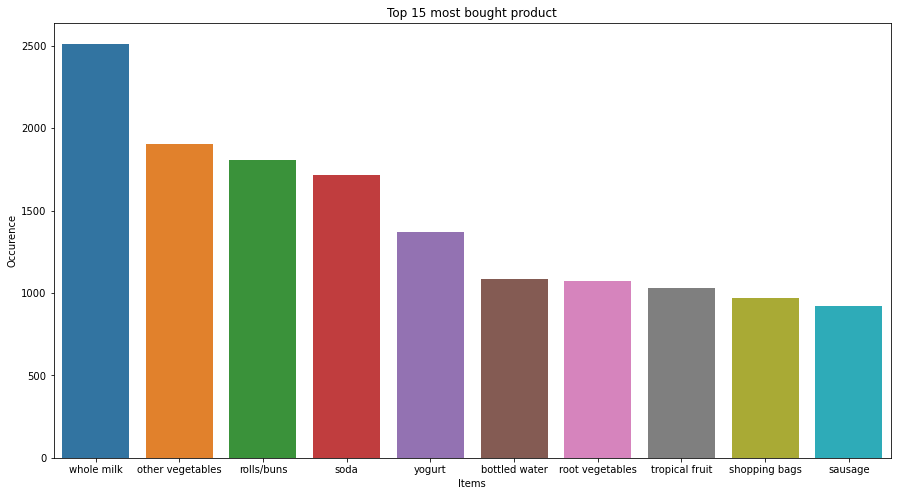

In [26]:
plt.figure(figsize=(15,8))
plt.title('Top 15 most bought product')
plot = sns.barplot(x=temp_df['Items'].value_counts().head(10).index, y=temp_df['Items'].value_counts().head(10))
plt.xlabel('Items')
plt.ylabel('Occurence')
plt.savefig('top_15_prod.png')

Também podemos mostrar os produtos ou items comprados mais raramente

<AxesSubplot:title={'center':'Rared bought products'}, ylabel='Items'>

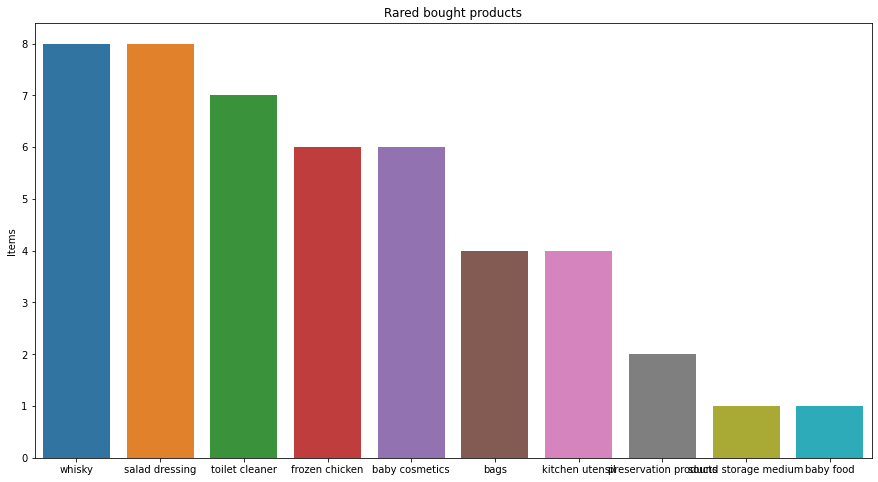

In [27]:
plt.figure(figsize=(15,8))
plt.title('Rared bought products')
sns.barplot(x=temp_df['Items'].value_counts().tail(10).index, y=temp_df['Items'].value_counts().tail(10))

A seguir usaremos o método transactionEncoder o qual codifica dados na forma de lista python em uma matriz numpy. Depois, iremos a colocaresses dados em um dataframe para referência futura.

In [28]:
# One-hot encode data in pandas dataframe
te = TransactionEncoder()
te_ary = te.fit(filter_data).transform(filter_data)

Agora mostraremos como fica a matriz de zeros (False) e Uns (True) para as primeiras cinco transações

In [29]:
transaction_group = pd.DataFrame(te_ary, columns=te.columns_)
transaction_group.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


## 3. Criando Regras de Associação usando o algoritmo Apriori

A seguir usaremos o algoritmo Apriori para criar as regras de associação nos dados analisados

Agora passamos o dataframe recém-formado (ou seja, transaction_group ou matriz de transações) para a função apriori. A partir daí, obtere valor de suporte e os nomes das colunas para os conjuntos de itens. 

A função apriori espera dados em um DataFrame pandas codificado do tipo one-hot, de modo que os dados de transação (ou seja, transaction_group) passaram como parâmetro. 

Nos precisamos fixar um valor mínimo de suporte que é usado para filtrar os dados acima desse valor. No código este valor é 0.01 (min_support=0.01). Se o suporte mínimo de itens definidos pelo candidato for inferior a min_support, então os itens serão removidos. A especificação (use_colnames=True) usa os nomes das colunas do dataframe no DataFrame obtido em vez de índices de coluna. Finalmente, (max_len=2) especifica o comprimento máximo dos conjuntos de itens gerados.

In [30]:
freq_itemsets = apriori(transaction_group, min_support=0.01, use_colnames=True, max_len = 2)
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x : len(x))

In [31]:
freq_itemsets

,support,itemsets,length
0,0.041558,(UHT-milk),1
1,0.022277,(baking powder),1
2,0.063835,(beef),1
3,0.041298,(berries),1
4,0.029964,(beverages),1
...,...,...,...
410,0.041298,"(whole milk, whipped/sour cream)",2
411,0.026576,"(yogurt, whipped/sour cream)",2
412,0.021886,"(whole milk, white bread)",2
413,0.011595,"(white bread, yogurt)",2



Finalmente, o último passo é criar as regras de associação. 
Podemos obtê-las usando a função de regras de associação que toma como entrada os seguintes parâmetros.

- freq_itemsets os quais foram dados da etapa anterior
- metric (métrica) em que as regras devem ser feitas como soporte, confiança, elevação (lift) já comentadas anteriormente em nosso código R. No caso estamos usando elevação.
- min (Valor mínimo) da elevação que será considerado.


In [32]:
rules = association_rules(freq_itemsets, metric="lift", min_threshold = 1)

A linha de código acima pode ser interpretada como definir regras usando a métrica de elevação que tem um valor mínimo de 1. As coisas ficarão mais claras a partir da saída anexada abaixo.

In [33]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']].head()

,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(UHT-milk),(other vegetables),0.010422,0.250784,1.045636,0.000455,1.014609
1,(other vegetables),(UHT-milk),0.010422,0.043455,1.045636,0.000455,1.001983
2,(whole milk),(baking powder),0.011855,0.038043,1.707729,0.004913,1.016390
3,(baking powder),(whole milk),0.011855,0.532164,1.707729,0.004913,1.471411
4,(beef),(citrus fruit),0.010813,0.169388,1.629349,0.004177,1.078770


Nesta saida temos os seguintes componentes
- Antecedente não é nada além de item sendo comprado. 

- Consequência não é nada além dos outros itens que são frequentemente comprados na mesma transação.

- O suporte mostra com que frequência o conjunto de itens aparece no conjunto de dados.

- Confiança explica a probabilidade de o item Y ser comprado quando o item X é comprado. 

- O elevador é um indicador de força relativa que mostra a associação entre 2 itens.

- A alavancagem tende a priorizar itens com maior suporte no conjunto de dados.

- A condenação mede o erro de regra esperado, ou seja, com que frequência o item X ocorre em uma transação onde o item Y não ocorre.

É assim que com a ajuda de métodos do pacote mlxtend pacote, o algoritmo apriori foi implementado em python. 

## Referencias

- Kuldeep Patle. The implementation of the Apriori algorithm in python using mlxtend library. https://github.com/kuldeeppatle21/MarketBasketAnalysis
 